# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

__Вторая часть задания про градиентный бустинг и третья про SVM ждут вас в соседних ноутбуках.__

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,461,106,52,107,211,62,8,200,33,23,161,218,602,200,67,9,17,194,201
1,85,110,58,106,180,51,6,261,26,28,171,278,998,257,83,9,13,181,182
2,48,89,47,81,147,64,11,156,44,20,163,170,352,188,76,6,13,184,193
3,287,88,43,84,136,55,11,154,44,19,150,174,350,164,73,6,2,185,196
4,435,85,37,68,145,60,6,130,51,18,130,150,253,121,65,3,14,195,203
5,260,83,37,54,118,55,4,129,52,18,127,146,245,140,81,4,13,180,184
6,402,101,52,105,162,53,10,212,31,24,163,226,669,204,74,12,11,186,194
7,515,76,38,58,125,58,5,133,51,18,127,152,259,145,87,0,21,177,184
8,761,115,51,100,201,60,12,196,34,23,162,207,573,184,62,22,1,198,208
9,739,96,44,85,166,66,10,155,43,19,150,167,355,159,67,3,10,192,202


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,420.204007,93.546448,44.734062,81.706740,167.706740,61.309654,8.400729,168.741348,41.003643,20.579235,147.677596,188.435337,439.876138,174.131148,72.688525,6.369763,12.495446,188.757741,195.316940
std,245.059441,8.418790,6.253346,15.976933,33.535083,7.215828,4.272608,33.719790,7.938403,2.623519,14.820824,32.291073,179.776593,33.210855,7.521228,4.906784,8.704102,6.282112,7.589954
min,3.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,213.000000,87.000000,40.000000,70.000000,139.000000,57.000000,6.000000,146.000000,33.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,5.000000,184.000000,189.000000
50%,415.000000,92.000000,44.000000,79.000000,166.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,177.000000,362.000000,173.000000,72.000000,5.000000,11.000000,188.000000,196.000000
75%,638.000000,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,589.000000,198.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,117.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int32
1     549 non-null int32
2     549 non-null int32
3     549 non-null int32
4     549 non-null int32
5     549 non-null int32
6     549 non-null int32
7     549 non-null int32
8     549 non-null int32
9     549 non-null int32
10    549 non-null int32
11    549 non-null int32
12    549 non-null int32
13    549 non-null int32
14    549 non-null int32
15    549 non-null int32
16    549 non-null int32
17    549 non-null int32
18    549 non-null int32
dtypes: int32(19)
memory usage: 40.8 KB


In [5]:
#print(y_train)

### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [6]:
# Importing SKlearn magic

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [7]:
# Подправим y_train, y_test так, чтобы там были цифры (на всякий случай)

y_train_scaled = []
y_test_scaled = []

for string in y_train:
    if string == 'opel':
        y_train_scaled.append(1)
    elif string == 'saab':
        y_train_scaled.append(2)
    elif string == 'bus':
        y_train_scaled.append(3)
    else:
        y_train_scaled.append(4)
        
for string in y_test:
    if string == 'opel':
        y_test_scaled.append(1)
    elif string == 'saab':
        y_test_scaled.append(2)
    elif string == 'bus':
        y_test_scaled.append(3)
    else:
        y_test_scaled.append(4)


In [8]:
# Препроцессим данные, потому что мы не пользуемся KNN, также мы не знаем корреляции
# поэтому нам в любом случае придётся применить регуляризацию

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [37]:
#print(X_train_scaled)

#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (не переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [10]:
lr_clf = LogisticRegression(multi_class = 'multinomial', max_iter = 20000, solver = 'saga', tol = 0.0001)

In [40]:
parametrs = {'C':np.linspace(0,10,10), 'penalty':['l1', 'l2']}

In [ ]:
gs = GridSearchCV(lr_clf, parametrs, cv = 5, scoring = 'accuracy', n_jobs=-1)

gs.fit(X_train_scaled, y_train_scaled)

In [ ]:
gs.best_estimator_

In [ ]:
# Фитим "лучшую" лог.регрессию

from sklearn.metrics import roc_curve, f1_score

lr_best = gs.best_estimator_
lr_best.fit(X_train_scaled, y_train_scaled)
y_pred = lr_best.predict(X_test_scaled)

In [ ]:
from matplotlib import pyplot as plt

arr_1_1, arr_2_1, thresh = roc_curve(y_pred, y_test_scaled, pos_label = 1)
arr_1_2, arr_2_2, thresh = roc_curve(y_pred, y_test_scaled, pos_label = 2)
arr_1_3, arr_2_3, thresh = roc_curve(y_pred, y_test_scaled, pos_label = 3)
arr_1_4, arr_2_4, thresh = roc_curve(y_pred, y_test_scaled, pos_label = 4)

f = plt.figure(figsize = (8, 6))

plt.plot(arr_1_1, arr_2_1, label = '1')
plt.plot(arr_1_2, arr_2_2, label = '2')
plt.plot(arr_1_3, arr_2_3, label = '3')
plt.plot(arr_1_4, arr_2_4, label = '4')
plt.legend()
plt.plot(np.linspace(0., 1., 49), np.linspace(0., 1., 49))
plt.show()

# Почему они то сверху, то снизу - никто не знает :c

In [ ]:
f1 = f1_score(y_pred, y_test_scaled, average='macro')


print('f1 score = {}'.format(f1))
print('Accuracy = {}'.format(lr_best.score(X_test_scaled, y_test_scaled)))

#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

In [17]:
# Импортируем

from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=5)

x_pca = pca.fit(X_train_scaled)

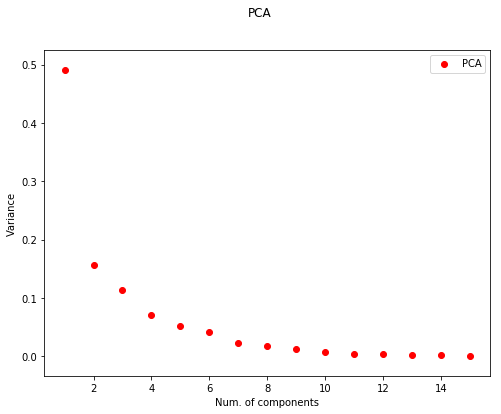

In [19]:
# На графике будем строить min(pca.explained_variance_ratio), минуму - потому что с каждым шагом будем видеть
# какую дисперсию мы добавляем в обработанные с помощью PCA данные

variance = []
num_comp = np.linspace(1, 15, 15)

for i in range(1, 16):
    k = i
    pca = PCA(n_components = k)
    x_pca = pca.fit(X_test_scaled)
    variance.append(min(x_pca.explained_variance_ratio_))
    
f = plt.figure(figsize = (8, 6))
f.suptitle('PCA')

plt.scatter(num_comp, variance, label = 'PCA', c = 'r')
plt.ylabel('Variance')
plt.xlabel('Num. of components')
plt.legend()
plt.show()

#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

#### Inside:
1) Возьмём 10 компонент, потому что у остальных компонент по сравнению с первыми 8-ю очень маленькая дисперсия, что видно на графике выше

In [20]:
pca = PCA(n_components=10)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)

#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

In [21]:
lr_pca = LogisticRegression(multi_class = 'multinomial', max_iter = 20000, solver = 'saga', tol = 0.0001)

In [22]:
parametrs = {'C':[7.5, 10., 11.], 'penalty':['l1', 'l2']}

In [23]:
gs = GridSearchCV(lr_pca, parametrs, cv = 5, scoring = 'accuracy', n_jobs=-1)

gs.fit(X_train_pca, y_train_scaled)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [7.5, 10.0, 11.0], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [24]:
gs.best_estimator_

LogisticRegression(C=7.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
lr_best_pca = LogisticRegression(multi_class = 'multinomial', max_iter = 20000, solver = 'saga', tol = 0.00001, C = 7.5, penalty = 'l1')
lr_best_pca.fit(X_train_pca, y_train_scaled)
y_pred_pca = lr_best_pca.predict(X_test_pca)

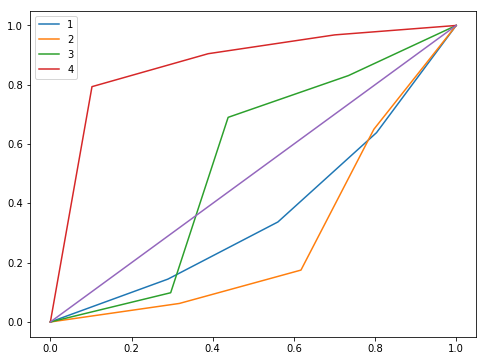

In [26]:
from matplotlib import pyplot as plt

arr_1_1, arr_2_1, thresh = roc_curve(y_pred_pca, y_test_scaled, pos_label = 1)
arr_1_2, arr_2_2, thresh = roc_curve(y_pred_pca, y_test_scaled, pos_label = 2)
arr_1_3, arr_2_3, thresh = roc_curve(y_pred_pca, y_test_scaled, pos_label = 3)
arr_1_4, arr_2_4, thresh = roc_curve(y_pred_pca, y_test_scaled, pos_label = 4)

f = plt.figure(figsize = (8, 6))

plt.plot(arr_1_1, arr_2_1, label = '1')
plt.plot(arr_1_2, arr_2_2, label = '2')
plt.plot(arr_1_3, arr_2_3, label = '3')
plt.plot(arr_1_4, arr_2_4, label = '4')
plt.legend()
plt.plot(np.linspace(0., 1., 49), np.linspace(0., 1., 49))
plt.show()

In [27]:
f1 = f1_score(y_pred_pca, y_test_scaled, average='macro')


print('f1 score = {}'.format(f1))
print('Accuracy = {}'.format(lr_best_pca.score(X_test_pca, y_test_scaled)))

f1 score = 0.5451026398603559
Accuracy = 0.5387205387205387


In [28]:
#print(X_train_scaled)

#### Inside:

1) С PCA что-то пошло не так. Хотя данные были препроцессены с использованем StandartScaler'a, но результаты получились какие-то дикие

#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [29]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(criterion='gini', splitter='best')
param_grid = {'max_depth':np.linspace(30, 60, 15)}

In [30]:
search = GridSearchCV(dec_tree, param_grid, cv = 5, scoring = 'accuracy', n_jobs=-1)

search.fit(X_train_scaled, y_train_scaled)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': array([30.     , 32.14286, 34.28571, 36.42857, 38.57143, 40.71429,
       42.85714, 45.     , 47.14286, 49.28571, 51.42857, 53.57143,
       55.71429, 57.85714, 60.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [31]:
search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini',
            max_depth=51.42857142857143, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [32]:
best_dt = search.best_estimator_
best_dt.fit(X_train_scaled, y_train_scaled)
y_pred_pca = best_dt.predict(X_test_scaled)

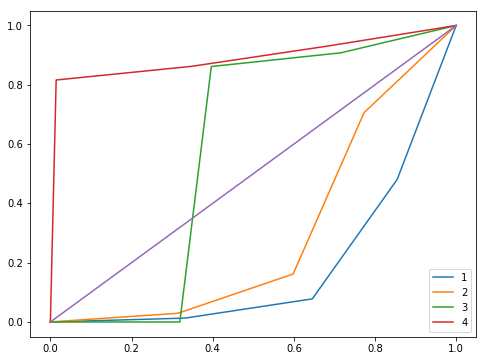

In [33]:
from matplotlib import pyplot as plt

arr_1_1, arr_2_1, thresh = roc_curve(y_pred_pca, y_test_scaled, pos_label = 1)
arr_1_2, arr_2_2, thresh = roc_curve(y_pred_pca, y_test_scaled, pos_label = 2)
arr_1_3, arr_2_3, thresh = roc_curve(y_pred_pca, y_test_scaled, pos_label = 3)
arr_1_4, arr_2_4, thresh = roc_curve(y_pred_pca, y_test_scaled, pos_label = 4)

f = plt.figure(figsize = (8, 6))

plt.plot(arr_1_1, arr_2_1, label = '1')
plt.plot(arr_1_2, arr_2_2, label = '2')
plt.plot(arr_1_3, arr_2_3, label = '3')
plt.plot(arr_1_4, arr_2_4, label = '4')
plt.legend()
plt.plot(np.linspace(0., 1., 49), np.linspace(0., 1., 49))
plt.show()

In [34]:
f1 = f1_score(y_pred, y_test_scaled, average='macro')


print('f1 score = {}'.format(f1))
print('Accuracy = {}'.format(best_dt.score(X_test_scaled, y_test_scaled)))

f1 score = 0.7748238823934166
Accuracy = 0.6868686868686869


#### Inside:

1) Наилучший показатель получился у решающего дерева с max_depth = 50

#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

In [ ]:
# Importing

from sklearn.ensemble import BaggingClassifier

In [ ]:
import warnings

warnings.filterwarnings('always')

In [ ]:
# Bagging for LogRes

f1_score_list = []
accuracy = []
num_est = np.linspace(2, 50, 49)

# Used estimator
lr_best_bagg = LogisticRegression(multi_class = 'multinomial', max_iter = 10000, solver = 'saga', tol = 0.00001, C = 6.0, penalty = 'l1')

for x in num_est:
    k = int(x)
    bagg = BaggingClassifier(base_estimator=lr_best_bagg, n_estimators=k, max_samples=1.0)
    bagg.fit(X_train_scaled, y_train_scaled)
    y_pred_bagg = bagg.predict(X_test_scaled)
    f1_score_list.append(f1_score(y_pred_bagg, y_test_scaled, average='macro'))
    accuracy.append(bagg.score(X_test_scaled, y_test_scaled))   

In [ ]:
# Plotting

f = plt.figure(figsize = (8, 6))
f.suptitle('Bagging for LogRes')

plt.plot(num_est, f1_score_list, label = 'f1 score')
plt.plot(num_est, accuracy, label = 'accuracy')
plt.legend()
#plt.plot(np.linspace(0., 1., 49), np.linspace(0., 1., 49))
plt.show()

In [ ]:
#Baggin for trees

f1_score_list_tree = []
accuracy_tree = []
num_est = np.linspace(2, 50, 49)

# Used estimator
best_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth = 38)

for x in num_est:
    k = int(x)
    bagg = BaggingClassifier(base_estimator=best_tree, n_estimators=k, max_samples=1.0)
    bagg.fit(X_train_scaled, y_train_scaled)
    y_pred_bagg = bagg.predict(X_test_scaled)
    f1_score_list_tree.append(f1_score(y_pred_bagg, y_test_scaled, average='macro'))
    accuracy_tree.append(bagg.score(X_test_scaled, y_test_scaled)) 

In [ ]:
# Plotting

f = plt.figure(figsize = (8, 6))
f.suptitle('Bagging for Trees')

plt.plot(num_est, f1_score_list_tree, label = 'f1 score')
plt.plot(num_est, accuracy_tree, label = 'accuracy')
plt.legend()
plt.show()

#### Inside:

1) Количество моделей, которое нужно использовать >= 20, после этого и f1_score, и accuracy выходят на некоторый уровень, вокруг которого просто флуктуирует с дальнейшем увеличением количеством алгоритмов.

2) Параметры решающего дерева скорее всего можно было выбрать по-другому. Из-за того, что наши предсказания по всем алгоритмам усредняются, то глубину дерева можно было взять поменьше, чтобы а) сэкономить время б) деревья были бы ещё более независимы.

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_res_f1 = []
forest_res_accuracy = []
num_trees = np.linspace(1, 50, 50)

for x in num_trees:
    k = int(x)
    forest = RandomForestClassifier(n_estimators = k)
    forest.fit(X_train_scaled, y_train_scaled)
    y_pred_forest = forest.predict(X_test_scaled)
    forest_res_f1.append(f1_score(y_pred_forest, y_test_scaled, average='macro'))
    forest_res_accuracy.append(forest.score(X_test_scaled, y_test_scaled))

In [ ]:
# Plotting

f = plt.figure(figsize = (8, 6))
f.suptitle('Random Forest')

plt.plot(num_trees, forest_res_f1, label = 'f1 score')
plt.plot(num_trees, forest_res_accuracy, label = 'accuracy')
plt.legend()
plt.show()

#### Inside:

1) Количество деревьев, которое нужно так же использовать >= 20. Поведения f1_score и accuracy схожи для bagging'a и для RandomForest.


#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [ ]:
# YOUR CODE HERE